In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
# from gplearn.genetic import SymbolicRegressor

In [2]:
# Load your dataset
df = pd.read_csv('processed_data.csv')

Data Cleaning

Data Transformation

In [3]:
# Assuming 'State' and 'Play Type' are the only categorical columns needing encoding
categorical_features = ['Lithology']

In [4]:
# One-hot encoding for the categorical data
one_hot_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
df_encoded = one_hot_encoder.fit_transform(df)

In [5]:
# Now df_encoded is a numpy array with one-hot encoded categorical features followed by the rest of the features
# You'll need to convert it back to a DataFrame if you want to keep the column labels
df_encoded = pd.DataFrame(df_encoded, columns=one_hot_encoder.get_feature_names_out())

In [6]:
df_encoded.corr()

,encoder__Lithology_Dolomite,encoder__Lithology_Limestone,encoder__Lithology_Sandstone,remainder__GeologicalFormationThickness(m),remainder__ReservoirThickness(m),remainder__GasPermeability(mD),remainder__LiquidPermeability(mD),remainder__RFC_P10,remainder__RFC_P25,remainder__RFC_P50,remainder__RFC_P75,remainder__RFC_P90
encoder__Lithology_Dolomite,1.000000,-0.017811,-0.311086,-0.009267,-0.005929,0.547861,0.547437,0.442761,0.426286,0.405927,0.383654,0.361612
encoder__Lithology_Limestone,-0.017811,1.000000,-0.944690,0.263757,0.167885,0.025610,0.013204,0.234192,0.249269,0.263434,0.274866,0.283409
encoder__Lithology_Sandstone,-0.311086,-0.944690,1.000000,-0.247670,-0.157635,-0.204050,-0.192119,-0.367840,-0.376767,-0.383553,-0.387114,-0.388004
remainder__GeologicalFormationThickness(m),-0.009267,0.263757,-0.247670,1.000000,0.856153,-0.005857,-0.009913,0.450731,0.485397,0.523825,0.560986,0.593198
remainder__ReservoirThickness(m),-0.005929,0.167885,-0.157635,0.856153,1.000000,-0.014936,-0.015960,0.473340,0.512763,0.558560,0.604770,0.646134
remainder__GasPermeability(mD),0.547861,0.025610,-0.204050,-0.005857,-0.014936,1.000000,0.999835,0.819163,0.788897,0.750954,0.708899,0.666842
remainder__LiquidPermeability(mD),0.547437,0.013204,-0.192119,-0.009913,-0.015960,0.999835,1.000000,0.815563,0.785052,0.746904,0.704708,0.662560
remainder__RFC_P10,0.442761,0.234192,-0.367840,0.450731,0.473340,0.819163,0.815563,1.000000,0.998495,0.992965,0.982898,0.969342
remainder__RFC_P25,0.426286,0.249269,-0.376767,0.485397,0.512763,0.788897,0.785052,0.998495,1.000000,0.997947,0.991424,0.981135
remainder__RFC_P50,0.405927,0.263434,-0.383553,0.523825,0.558560,0.750954,0.746904,0.992965,0.997947,1.000000,0.997745,0.991445


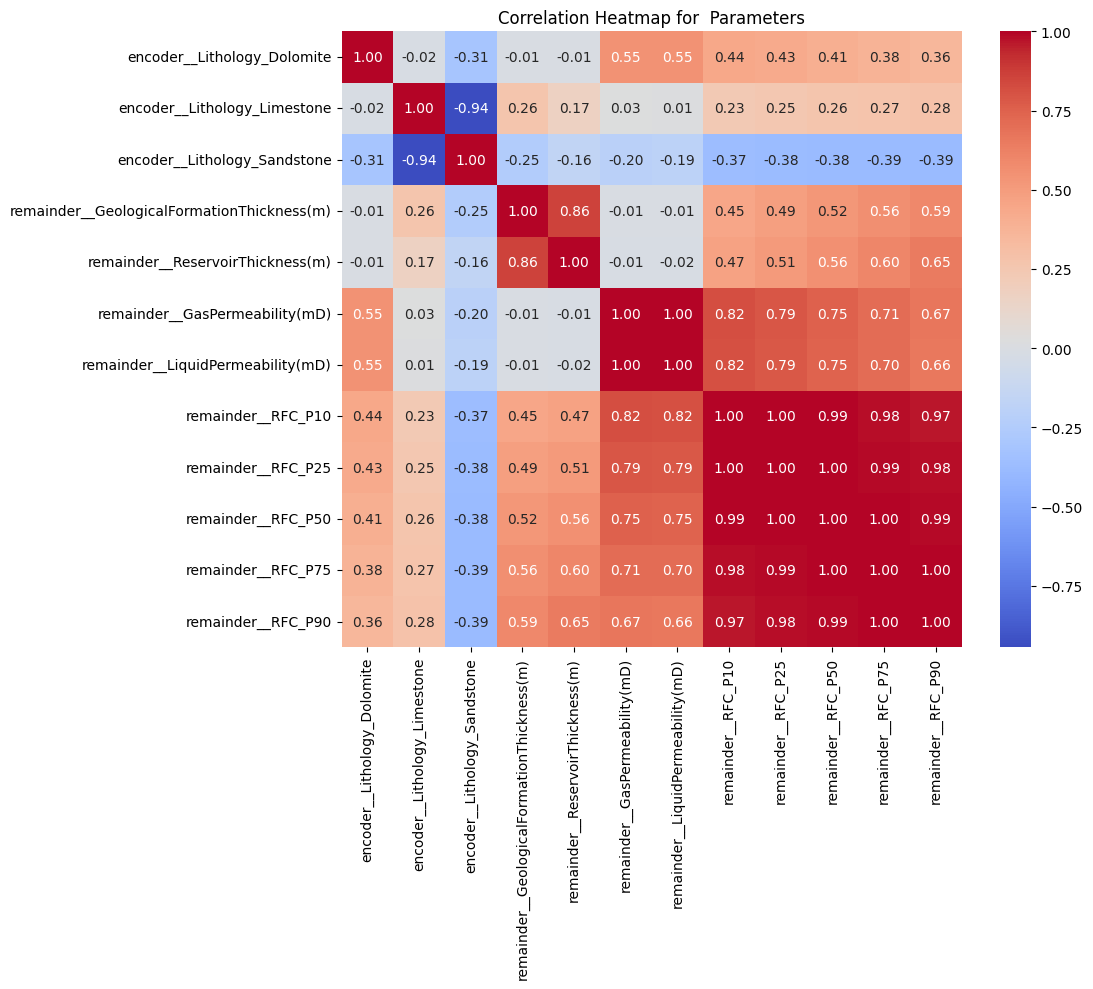

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for  Parameters')
plt.show()

In [8]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   encoder__Lithology_Dolomite                 1715 non-null   float64
 1   encoder__Lithology_Limestone                1715 non-null   float64
 2   encoder__Lithology_Sandstone                1715 non-null   float64
 3   remainder__GeologicalFormationThickness(m)  1715 non-null   float64
 4   remainder__ReservoirThickness(m)            1715 non-null   float64
 5   remainder__GasPermeability(mD)              1715 non-null   float64
 6   remainder__LiquidPermeability(mD)           1715 non-null   float64
 7   remainder__RFC_P10                          1715 non-null   float64
 8   remainder__RFC_P25                          1715 non-null   float64
 9   remainder__RFC_P50                          1715 non-null   float64
 10  remainder__R

Split to text and train

In [9]:
# Using iloc to separate features and targets
X = df_encoded.iloc[:, :7].values  # Selects all rows and columns up to but not including the 7th index
y = df_encoded.iloc[:, 9:10].values  # Targets are from the 7th column to the end

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Support Vector Regression

Using Gridsearch to get optimal kernel type, regularization parameter C, and epsilon)

In [12]:
# Initialize and train the SVM model
svr = SVR()

In [13]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [55]:
# Define the parameter grid to search over

param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': np.arange(200, 500, 50),  # Range from 200 to 500 with steps of 50
    'epsilon': np.arange(3.0, 7, 0.5)  # Range from 3.0 to 7.0 with steps of 0.5
}

# Create SVR model
svr = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=kf, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVR(),
             param_grid={'C': array([200, 250, 300, 350, 400, 450]),
                         'epsilon': array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5]),
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='r2')

In [56]:
# Create a DataFrame to store the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.104624,0.022340,0.002759,0.000645,200,3.0,linear,"{'C': 200, 'epsilon': 3.0, 'kernel': 'linear'}",0.063890,0.882729,...,0.054495,0.993816,0.498905,0.370142,0.999275,0.198164,0.061025,0.442065,0.365527,124
1,0.169107,0.061366,0.003267,0.000795,200,3.0,poly,"{'C': 200, 'epsilon': 3.0, 'kernel': 'poly'}",0.997878,0.987573,...,0.999448,0.998012,0.335808,0.878554,0.999374,0.930606,0.988676,0.907314,0.194147,48
2,0.126091,0.013879,0.008004,0.001123,200,3.0,rbf,"{'C': 200, 'epsilon': 3.0, 'kernel': 'rbf'}",0.193346,0.165624,...,0.141714,0.123144,0.753455,0.869965,0.114890,0.740851,0.200987,0.412092,0.315634,137
3,0.180072,0.033256,0.004621,0.001129,200,3.5,linear,"{'C': 200, 'epsilon': 3.5, 'kernel': 'linear'}",0.063840,0.882870,...,0.054613,0.993845,0.509338,0.370564,0.999279,0.199830,0.061012,0.443560,0.365512,122
4,0.144135,0.064057,0.002596,0.000106,200,3.5,poly,"{'C': 200, 'epsilon': 3.5, 'kernel': 'poly'}",0.997895,0.987612,...,0.999452,0.998024,0.339556,0.880479,0.999378,0.930553,0.988718,0.907926,0.193030,44


In [58]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_epsilon', 'param_kernel', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

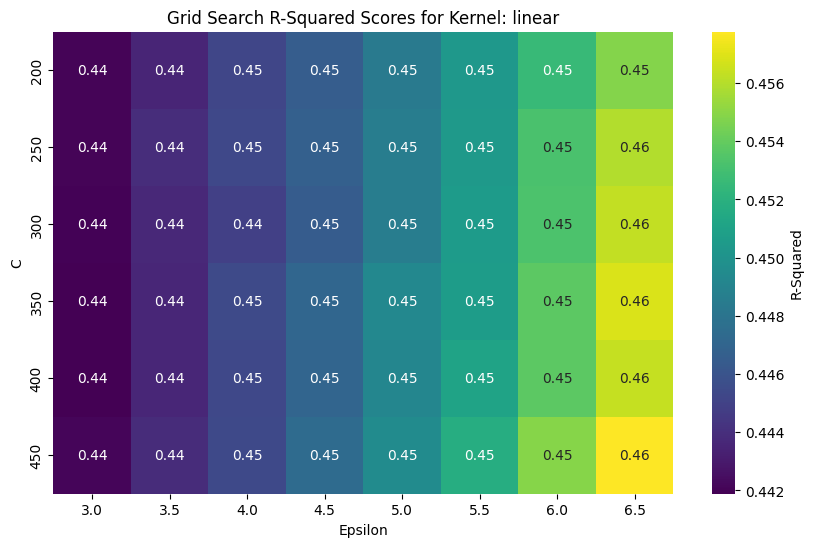

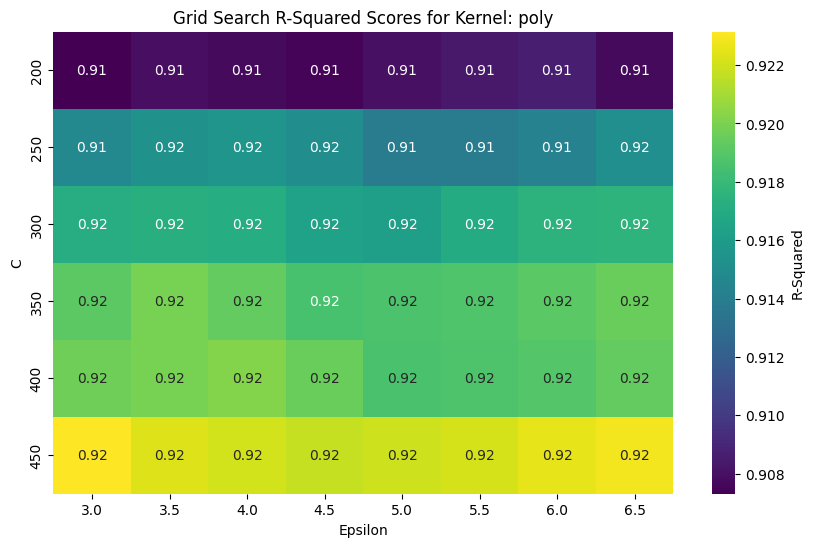

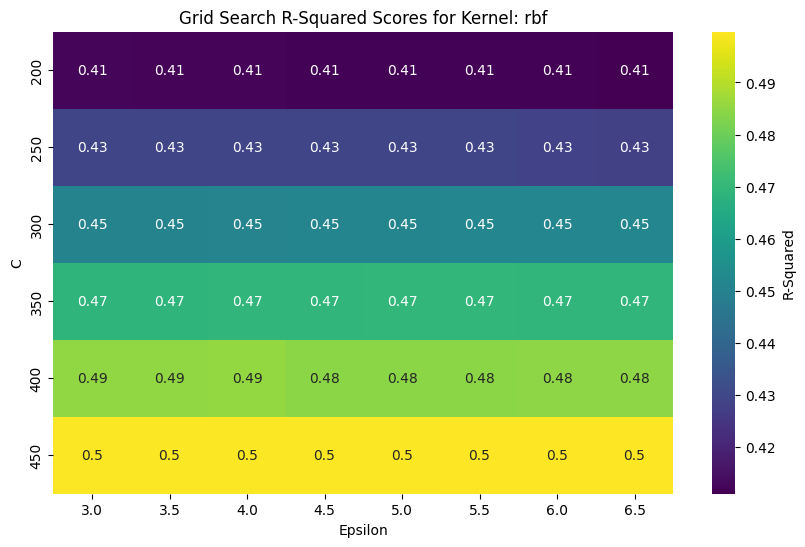

In [62]:
# Filter out the columns of interest
results_filtered = results[['param_kernel', 'param_C', 'param_epsilon', 'mean_test_score']]

# Reshape the results to be suitable for a heatmap (for each kernel type)
for kernel in results_filtered['param_kernel'].unique():
    subset = results_filtered[results_filtered['param_kernel'] == kernel]

    # Create a pivot table for heatmap
    pivot_table = subset.pivot(index='param_C', columns='param_epsilon', values='mean_test_score')

    # Plotting the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, cmap="viridis", cbar_kws={'label': 'R-Squared'})
    plt.title(f'Grid Search R-Squared Scores for Kernel: {kernel}')
    plt.xlabel('Epsilon')
    plt.ylabel('C')
    plt.show()

In [76]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))

Best parameters: {'C': 450, 'epsilon': 3.0, 'kernel': 'poly'}
Best cross-validation score: -0.92


In [77]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on your test set
best_estimator.fit(X_train_scaled, y_train)
y_pred = best_estimator.predict(X_test)

# Calculate metrics like MSE, R2, MAE, etc.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
print(f"best param: {best_params}")
print(f"best param: {best_estimator}")
print(f"mse: {mse}")
print(f"mae: {mae}")
print(f"r2: {r2}")

best param: {'C': 450, 'epsilon': 3.0, 'kernel': 'poly'}
best param: SVR(C=450, epsilon=3.0, kernel='poly')
mse: 20660137016374.285
mae: 694584.7692550346
r2: -1182680877.8582094


Train with optimal kernel type, regularization parameter C, and epsilon)

SVR Training

In [ ]:
# # Initialize and train the SVM model
# svr = SVR(kernel='poly', C=450, epsilon=5.5)

In [14]:
# Initialize and train the SVM model
svr = SVR(kernel='poly', C=450, epsilon=3.0)

In [15]:
svr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=450, epsilon=3.0, kernel='poly')

In [16]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(svr, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [17]:
# Make predictions
predictions = svr.predict(X_test_scaled)

In [18]:
# Now calculate the mean squared error (MSE) between the test labels and the predictions
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
explained_variance = explained_variance_score(y_test, predictions)

In [19]:
# Print the performance metrics(450, 3.0)
print("R-squared:", r_squared)
print("Mean Squared Error on Test Set:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Explained Variance Score:", explained_variance)
print(f'Cross-Validation RMSE: {np.sqrt(-cross_val_scores.mean())}')

R-squared: 0.7293752171379058
Mean Squared Error on Test Set: 4727.517958483644
Root Mean Squared Error: 68.75694843783896
Mean Absolute Error: 15.287075099799779
Explained Variance Score: 0.7318595738215682
Cross-Validation RMSE: 58.990409615532336


In [ ]:
# Print the performance metrics(400,5.5)
print("R-squared:", r_squared)
print("Mean Squared Error on Test Set:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Explained Variance Score:", explained_variance)
print(f'Cross-Validation RMSE: {np.sqrt(-cross_val_scores.mean())}')

R-squared: 0.7925212176127469
Mean Squared Error on Test Set: 3624.4266299878714
Root Mean Squared Error: 60.20321112688153
Mean Absolute Error: 16.405502214313582
Explained Variance Score: 0.7934699391653319
Cross-Validation RMSE: 58.305506311890944


In [20]:
# Create a DataFrame to compare predictions side by side
comparison_df = pd.DataFrame({
    'Actual': y_test.flatten(),  # Flatten y_test if it's multi-dimensional
    'Predicted': predictions.flatten()  # Flatten predictions if necessary
})

# Display the first few rows of the DataFrame to inspect
print(comparison_df.head(30))

       Actual  Predicted
0     0.97426   3.317164
1     1.53090   4.024943
2     2.17370   6.625168
3     1.14440   2.884961
4     0.02093   7.968975
5     2.99180   1.233885
6     0.87474   3.156362
7    19.69200   2.197966
8     1.22200   1.143849
9     0.81330   1.080775
10    1.85530   8.797798
11    0.44057   1.712431
12    1.15070   4.217858
13    1.22200   1.143849
14    1.27820   1.148461
15    0.67821   2.037043
16    1.23660   3.747907
17    0.90910   3.276840
18    1.23660   3.747907
19  150.25000   5.719019
20    1.22200   1.143849
21    0.00678   2.419193
22    2.99180   1.233885
23    0.81897   2.737312
24    0.44057   1.712431
25  139.20000  97.329863
26    1.22200   1.143849
27    0.46276   1.857126
28    1.86340   7.494402
29    1.34750   4.948166


In [21]:
comparison_df.to_csv('SVR_comparison_df.csv', index=False)

In [95]:
!pip install gplearn
from gplearn.genetic import SymbolicRegressor

In [96]:
symbolic_regressor = SymbolicRegressor(population_size=5000,
                                       generations=20,
                                       stopping_criteria=0.01,
                                       p_crossover=0.7,
                                       p_subtree_mutation=0.1,
                                       p_hoist_mutation=0.05,
                                       p_point_mutation=0.1,
                                       max_samples=0.9,
                                       verbose=1,
                                       parsimony_coefficient=0.01,
                                       random_state=42)

symbolic_regressor.fit(X_test, predictions)

# Print the obtained symbolic expression
print(symbolic_regressor._program)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    27.79      9.86129e+10       15          9.08952          11.4158      1.75m
   1    13.00           215502       15          5.71675          46.1532      1.80m
   2    11.19          838.965        9          5.58468          42.7048      1.46m
   3    11.57          1405.72       13          5.00743          40.9984      1.37m
   4    12.78          15981.4        9          4.52552          49.3717      1.55m
   5    13.94          58139.8       11          4.45581          49.9267      1.18m
   6    15.17          1246.45       15          4.43921          48.8592      1.37m
   7    16.36          1651.93       29          4.10011          49.3832      1.04m
   8    17.76          2681.85       13          4.21456          48.0328  

Visualization

In [97]:
column_names = ['encoder__Lithology_Dolomite', 'encoder__Lithology_Limestone',
                'encoder__Lithology_Sandstone', 'remainder__GeologicalFormationThickness(m)',
                'remainder__ReservoirThickness(m)', 'remainder__GasPermeability(mD)',
                'remainder__LiquidPermeability(mD)', 'remainder__RFC_P10',
                'remainder__RFC_P25', 'remainder__RFC_P50', 'remainder__RFC_P75',
                'remainder__RFC_P90']

# Remove prefixes from column names
modified_column_names = [name.replace('encoder__', '').replace('remainder__', '') for name in column_names]

print(modified_column_names)

['Lithology_Dolomite', 'Lithology_Limestone', 'Lithology_Sandstone', 'GeologicalFormationThickness(m)', 'ReservoirThickness(m)', 'GasPermeability(mD)', 'LiquidPermeability(mD)', 'RFC_P10', 'RFC_P25', 'RFC_P50', 'RFC_P75', 'RFC_P90']


In [98]:
df_encoded_features = modified_column_names
feature_names = df_encoded_features[:7]

In [103]:
# Get support vectors and their indices
support_vector_indices = svr.support_
support_vectors = X[support_vector_indices]


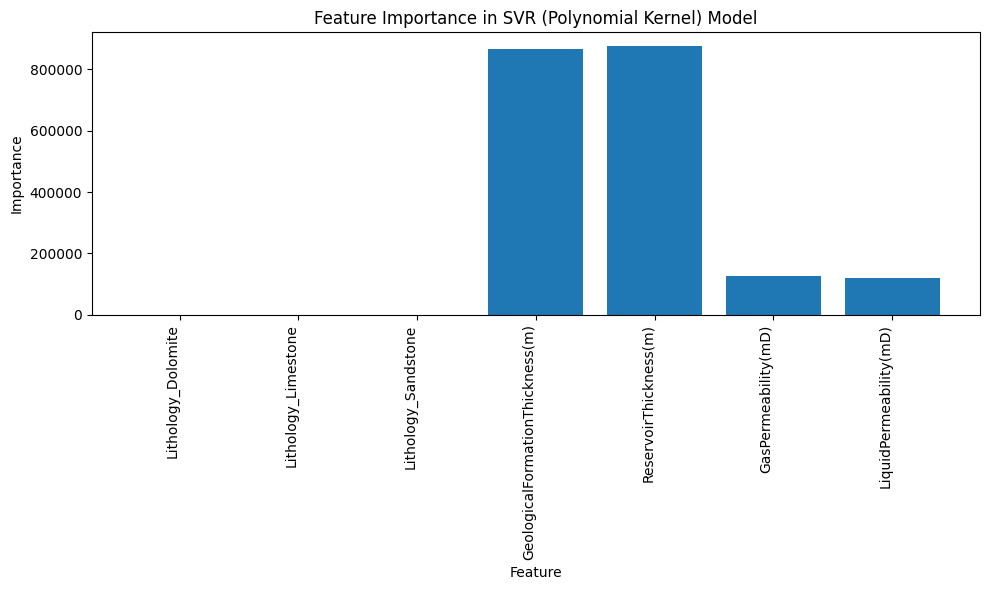

In [101]:
# Get dual coefficients of support vectors
dual_coefficients = svr.dual_coef_.ravel()

# Calculate feature importance based on dual coefficients
feature_importance = np.abs(np.dot(dual_coefficients, support_vectors))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), feature_names, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance in SVR (Polynomial Kernel) Model')
plt.tight_layout()
plt.show()

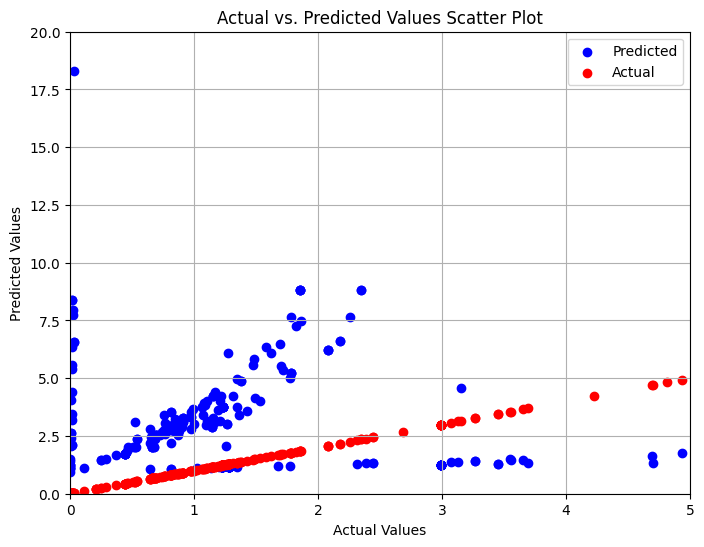

In [102]:
# Create a scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], color='blue', label='Predicted')
plt.scatter(comparison_df['Actual'], comparison_df['Actual'], color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Scatter Plot')
plt.xlim(0, 5)  # Limit x-axis to 20
plt.ylim(0, 20)  # Limit y-axis to 20
plt.legend()
plt.grid(True)
plt.show()